In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/Flowers-Dataset/flowers",target_size=(128,128),batch_size=32,class_mode="categorical")

Found 331 images belonging to 5 classes.


In [13]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [14]:
from keras.models import Sequential

model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))

In [15]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(x_train,steps_per_epoch=100,epochs=20,validation_data=x_train)

Epoch 1/20
 11/100 [==>...........................] - ETA: 18s - loss: 0.1473 - accuracy: 0.9305

100/100 [==============================] - 13s 48ms/step - loss: 0.1473 - accuracy: 0.9305 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [16]:
model.save("flower.h5")

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

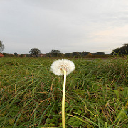

In [27]:
model = load_model("/content/flower.h5")
img = image.load_img(r"/content/drive/MyDrive/Flowers-Dataset/flowers/dandelion/10294487385_92a0676c7d_m.jpg",target_size=(128,128))
img

In [28]:
type(img)

PIL.Image.Image

In [29]:
x = image.img_to_array(img)
x

array([[[212., 213., 215.],
        [212., 213., 215.],
        [212., 213., 215.],
        ...,
        [239., 236., 231.],
        [239., 236., 231.],
        [239., 236., 231.]],

       [[214., 215., 217.],
        [214., 215., 217.],
        [214., 215., 219.],
        ...,
        [241., 238., 233.],
        [241., 238., 233.],
        [241., 238., 233.]],

       [[214., 215., 219.],
        [214., 215., 219.],
        [214., 215., 219.],
        ...,
        [241., 238., 233.],
        [241., 238., 233.],
        [242., 239., 234.]],

       ...,

       [[ 86., 101.,  44.],
        [ 77.,  85.,  44.],
        [ 65.,  74.,  17.],
        ...,
        [ 94., 109.,  28.],
        [ 68.,  82.,  21.],
        [ 78.,  82.,  23.]],

       [[112., 124.,  42.],
        [ 19.,  27.,   0.],
        [ 63.,  57.,  25.],
        ...,
        [ 41.,  71.,   0.],
        [115.,  89.,  40.],
        [ 56.,  99.,  27.]],

       [[ 60.,  59.,  13.],
        [ 61.,  72.,   6.],
        [ 99.,  

In [30]:
x.shape

(128, 128, 3)

In [31]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 128, 128, 3)

In [32]:
pred_prob = model.predict(x)
pred_prob

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [33]:
class_name = ["daisy","dandelion","rose","sunfower","tulip"]
pred_id = pred_prob.argmax(axis=1)[0]
pred_id

4

# ***Test the Model***

In [34]:
print("Predicted flower is",str(class_name[pred_id]))

Predicted flower is tulip
